In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def plot_series(time, series, format='-', start=0, end=None, label=None):

  plt.figure(figsize=(10,6))

  plt.plot(time[start:end], series[start:end], format)

  plt.xlabel('Time')
  plt.ylabel('Value')

  if label: 
    plt.legend(fontsize=14, labels=label)

  plt.grid(True)
  plt.show()  

In [ ]:
def trend(time, slope=0):
  series = time * slope

  return series

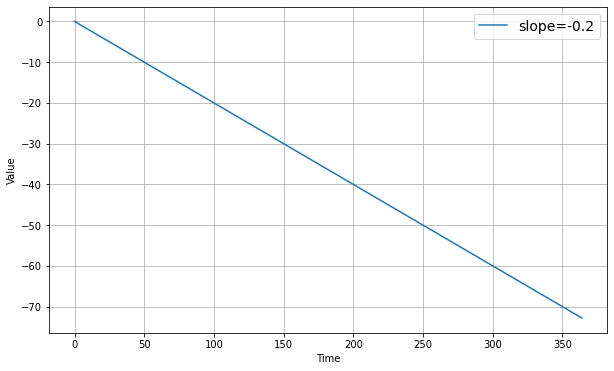

In [ ]:
time = np.arange(365)
slope=-0.2

series = trend(time, slope)

plot_series(time=time, series=series, label=[f'slope={slope}'])

In [ ]:
def seasonal_pattern(season_time):

  data_pattern = np.where(season_time<0.4,
                          np.cos(season_time*2*np.pi),
                          1/np.exp(season_time*3))
  
  return data_pattern


def seasonality(time, period, amplitude=1, phase=0):

  season_time = ((time+phase)%period)/period

  data_pattern = amplitude*seasonal_pattern(season_time)

  return data_pattern

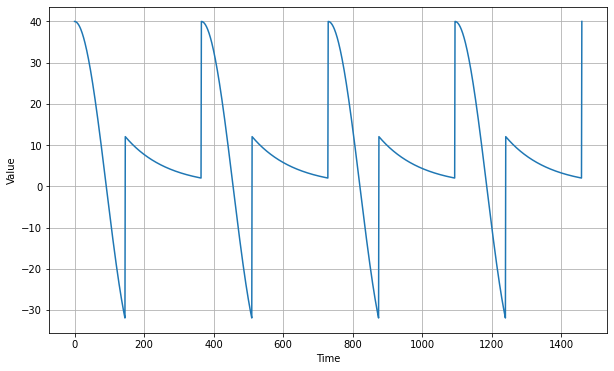

In [ ]:
time = np.arange(4*365+1)

period = 365
amplitude = 40

series = seasonality(time, period=period, amplitude=amplitude)

plot_series(time, series)

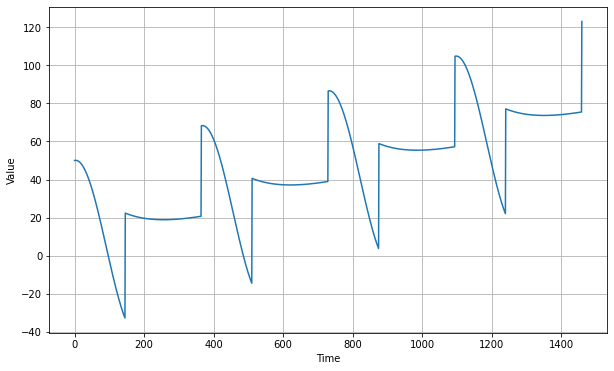

In [ ]:
slope=0.05
period=365
amplitude=50

series = trend(time, slope)+seasonality(time, period=period, amplitude=amplitude)

plot_series(time, series)

In [ ]:
def noise(time, noise_level=1, seed=None):

  rnd = np.random.RandomState(seed)

  noise = rnd.randn(len(time))*noise_level

  return noise

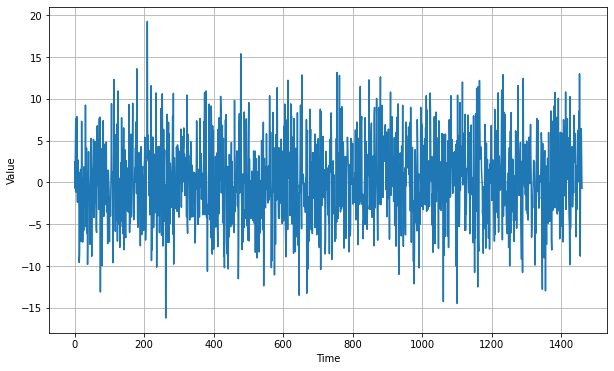

In [ ]:
noise_level = 5

noise_signal = noise(time, noise_level=noise_level, seed=42)

plot_series(time, noise_signal)

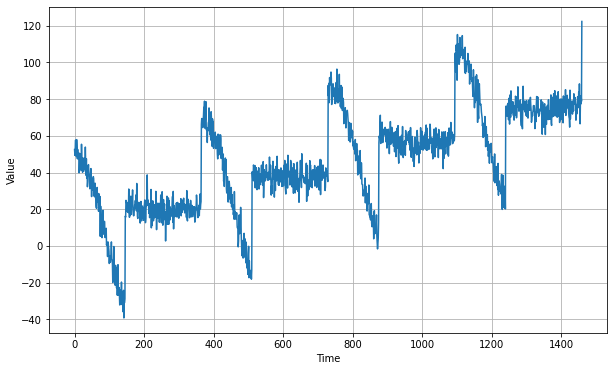

In [ ]:
series+=noise_signal

plot_series(time, series)

In [ ]:
def autocorrellation(time, amplitude, seed=None):

  rnd = np.random.RandomState(seed)

  ar = rnd.randn(len(time)+50)

  ar[:50] = 100

  phi1 = 0.5
  phi2 = -0.1

  for step in range(50, len(time)+50):
    ar[step] += phi1 * ar[step-50]
    ar[step] += phi2 * ar[step-33]
  
  ar = ar[50:] * amplitude

  return ar  

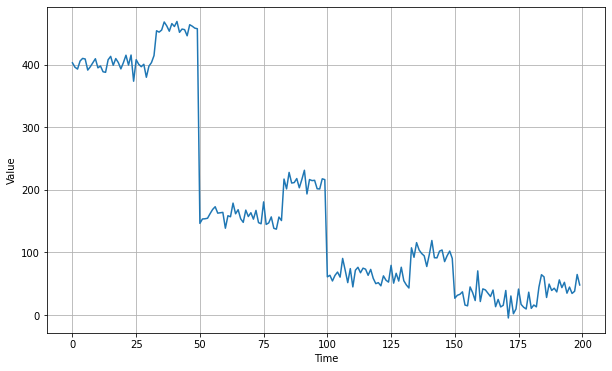

In [ ]:
series = autocorrellation(time, amplitude=10, seed=42)

plot_series(time[:200], series[:200])

In [ ]:
def autocorrellation(time, amplitude, seed=None):

  rnd = np.random.RandomState(seed)

  ar = rnd.randn(len(time)+1)
  print(ar)

  phi = 0.8

  for step in range(1, len(time)+1):
    ar[step] += phi*ar[step-1]

  ar = ar[1:]*amplitude

  return ar  

[ 0.49671415 -0.1382643   0.64768854 ...  0.67318135 -0.13845598
 -1.22429824]


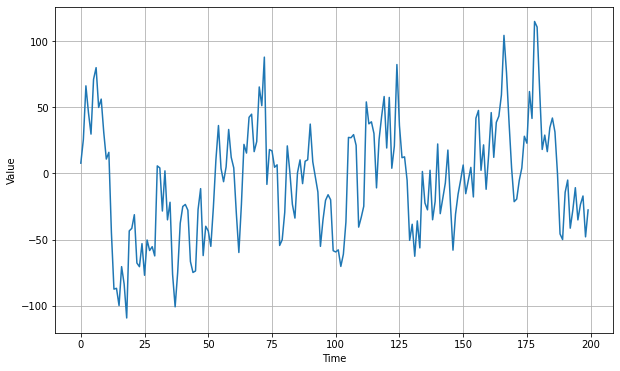

In [ ]:
series = autocorrellation(time, amplitude=30, seed=42)

plot_series(time[:200], series[:200])